<a href="https://colab.research.google.com/github/house84/Artificial-Intelligence/blob/master/FeatureRemovalProjectDataTesting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Keep Colab from disconnecting: CTRL+SHFT+i --> copy into console

function ClickConnect(){
console.log("Working"); 
document.querySelector("colab-toolbar-button#connect").click() 
}
setInterval(ClickConnect,60000)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import categorical_accuracy
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Using TensorFlow backend.
/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
from google.colab import files
uploaded = files.upload()

Saving ProjDataAccidentDUICategorized.csv to ProjDataAccidentDUICategorized.csv


In [0]:
import pandas as pd
data = pd.read_csv('ProjDataAccidentDUICategorized.csv', delimiter=',', dtype="category") 

data.head()
#print(data.dtypes)

STATE PVH PERNOTMVIT  PERMVIT  ... CF3 FATALS MinutesOfDay Drunk Driver Involved
0     1   1           0       1  ...   0      1            2                     0
1     1   0           0       2  ...   0      2            1                     0
2     1   0           0       2  ...   0      1            1                     0
3     1   0           0       2  ...   0      1            3                     0
4     1   0           0       2  ...   0      1            2                     0

[5 rows x 29 columns]

In [0]:
n = []
v= np.arange(1,30)
for i in data.columns:
    n.append(i)
#print(n)
#print(v)
Headers= np.column_stack((v, n))
print(Headers)

[['1' 'STATE']
 ['2' 'PVH']
 ['3' 'PERNOTMVIT ']
 ['4' 'PERMVIT']
 ['5' 'PERSONS']
 ['6' 'DAY']
 ['7' 'MONTH']
 ['8' 'DAYofWEEK']
 ['9' 'NHS']
 ['10' 'Urban(1)orRural(2)']
 ['11' 'FUNC_SYS']
 ['12' 'RD_OWNER']
 ['13' 'ROUTE']
 ['14' 'SP_JUR']
 ['15' 'HARM_EV']
 ['16' 'MAN_COLL']
 ['17' 'RELJCT1']
 ['18' 'RELJCT2']
 ['19' 'TYP_INT']
 ['20' 'WRK_ZONE']
 ['21' 'REL_ROAD']
 ['22' 'LGT_COND']
 ['23' 'WEATHER1']
 ['24' 'CF1']
 ['25' 'CF2']
 ['26' 'CF3']
 ['27' 'FATALS']
 ['28' 'MinutesOfDay']
 ['29' 'Drunk Driver Involved']]


In [0]:
import numpy as np
dataset = np.genfromtxt('ProjDataAccidentDUICategorized.csv', delimiter=",", skip_header = True) 
print(dataset.shape)

(33654, 29)


In [0]:
#print(data.iloc[0,0])
print(dataset.shape)
print(dataset[0:15])

(33654, 29)
[[ 1.  1.  0.  1.  1.  5.  1.  6.  1.  1.  1.  1.  1.  0. 14.  0.  0.  1.
   1.  0.  2.  4.  1.  0.  0.  0.  1.  2.  0.]
 [ 1.  0.  0.  2.  2.  8.  1.  2.  1.  2.  1.  1.  1.  0. 38.  0.  1. 12.
   1.  0.  3.  2.  2. 20.  0.  0.  2.  1.  0.]
 [ 1.  0.  0.  2.  2.  8.  1.  2.  1.  1.  1.  1.  1.  0. 24.  0.  0.  1.
   1.  1.  4.  2. 10.  0.  0.  0.  1.  1.  0.]
 [ 1.  0.  0.  2.  2.  9.  1.  3.  1.  1.  1.  1.  1.  0. 24.  0.  0.  1.
   1.  0.  4.  1. 10.  0.  0.  0.  1.  3.  0.]
 [ 1.  0.  0.  2.  2. 19.  1.  6.  1.  2.  1.  1.  1.  0. 12.  1.  0.  1.
   1.  0.  1.  1.  1.  0.  0.  0.  1.  2.  0.]
 [ 1.  1.  4.  1.  4. 19.  1.  6.  1.  1.  1.  1.  1.  0. 14.  0.  0.  1.
   1.  0.  2.  2.  1. 23. 19. 15.  1.  1.  0.]
 [ 1.  0.  1.  1.  1. 21.  1.  1.  1.  2.  1.  1.  1.  0.  8.  0.  0.  1.
   1.  0.  1.  1.  1.  0.  0.  0.  1.  2.  0.]
 [ 1.  0.  1.  1.  1. 23.  1.  3.  1.  2.  1.  1.  1.  0. 12.  1.  0.  1.
   1.  0.  1.  2. 10. 19. 23.  0.  1.  1.  0.]
 [ 1.  0.  0.  1.  1

In [0]:
#Splitting Inputs and Output
X=dataset[:,:28] #Inputs
y=dataset[:,28]  #Output
print(X.shape)
print(y.shape)
#print(z.shape)
#print(z[0,0])

#Train Test Split and seed
from sklearn.model_selection import train_test_split
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(X, y, random_state= 4300, 
test_size = .15, shuffle=True) #, stratify=y )
print(XTRAIN.shape)
print(XVALID.shape)
print(YTRAIN.shape)
print(YVALID.shape)

(33654, 28)
(33654,)
(28605, 28)
(5049, 28)
(28605,)
(5049,)


/////////////////////////////////////////////////////////0
Epoch 1/10
1/2 [==============>...............] - ETA: 0s - loss: 0.5884 - binary_accuracy: 0.7510
Epoch 00001: val_loss improved from inf to 0.58607, saving model to project.hdf5
2/2 [==============================] - 0s 56ms/step - loss: 0.5883 - binary_accuracy: 0.7508 - val_loss: 0.5861 - val_binary_accuracy: 0.7524
Epoch 2/10
1/2 [==============>...............] - ETA: 0s - loss: 0.5868 - binary_accuracy: 0.7512
Epoch 00002: val_loss improved from 0.58607 to 0.58464, saving model to project.hdf5
2/2 [==============================] - 0s 21ms/step - loss: 0.5871 - binary_accuracy: 0.7508 - val_loss: 0.5846 - val_binary_accuracy: 0.7524
Epoch 3/10
1/2 [==============>...............] - ETA: 0s - loss: 0.5860 - binary_accuracy: 0.7502
Epoch 00003: val_loss improved from 0.58464 to 0.58326, saving model to project.hdf5
2/2 [==============================] - 0s 22ms/step - loss: 0.5848 - binary_accuracy: 0.7508 - val_loss: 0.58

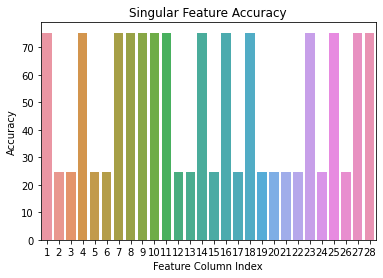

In [0]:
#Iteratively run model on each input column and store accuracy

Features = data.columns
#print(Features) 
FeatureAccuracy = np.zeros(len(Features)-1)

for i in range (len(Features)-1): 
  print("/////////////////////////////////////////////////////////" + str(i))
  model = Sequential()
  model.add(Dense(10, input_dim = 1, kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  callback_a = ModelCheckpoint(filepath= 'project.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
  callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose=1)
  history = model.fit(XTRAIN[:,i], YTRAIN, batch_size=23000, epochs=10, verbose=1, validation_data=(XVALID[:,i], YVALID), callbacks=[callback_a, callback_b]) 
  model.load_weights('project.hdf5')
  prediction = model.predict(XVALID[:,i])
  prediction = np.round(np.clip(model.predict(XVALID[:,i]), 0, 1)) # binary
  Validation_Accuracy = accuracy_score(YVALID, prediction.round())
  FeatureAccuracy[i] = (Validation_Accuracy * 100)
  
Nums = np.arange(1,29)

plt.clf() 
fig= sns.barplot(x=Nums, y=FeatureAccuracy)
plt.xlabel("Feature Column Index")
plt.ylabel("Accuracy")
plt.title("Singular Feature Accuracy")
plt.show()

In [0]:
#Sort Features by Accuracy
AccArray = np.vstack((Nums, FeatureAccuracy)).T
AccArray = AccArray[np.argsort(AccArray[:, 1])]
print(AccArray)
#fig.set_xticklabels(fig.get_xticklabels(), rotation=90)

#Show Graph
plt.clf() 
fig= sns.barplot(x=Nums, y=FeatureAccuracy)  #sns.barplot( x=0 , y=1, data=AccArray)
plt.xlabel("Feature Columns Index Number Sorted By Accuracy")
plt.ylabel("Accuracy")
plt.title("Singular Feature Accuracy")
plt.show()


In [0]:
#Run Model on Features by iteratively removing least important to most

removal=[]
FeatureAccuracy2 = np.zeros(len(Features)-3)

for i in range (len(Features)-3):
  removal.append(AccArray[i,0])
  print(removal)

  Reduction=np.delete(XTRAIN, removal, axis=1)
  print(Reduction.shape)
  RedValid=np.delete(XVALID, removal, axis=1)
  print(RedValid.shape)
  print("/////////////////////////////////////////////////////////" + str(i+1))

[17.0]
(28605, 27)
(5049, 27)
/////////////////////////////////////////////////////////1
[17.0, 2.0]
(28605, 26)
(5049, 26)
/////////////////////////////////////////////////////////2
[17.0, 2.0, 3.0]
(28605, 25)
(5049, 25)
/////////////////////////////////////////////////////////3
[17.0, 2.0, 3.0, 26.0]
(28605, 24)
(5049, 24)
/////////////////////////////////////////////////////////4
[17.0, 2.0, 3.0, 26.0, 5.0]
(28605, 23)
(5049, 23)
/////////////////////////////////////////////////////////5
[17.0, 2.0, 3.0, 26.0, 5.0, 6.0]
(28605, 22)
(5049, 22)
/////////////////////////////////////////////////////////6
[17.0, 2.0, 3.0, 26.0, 5.0, 6.0, 15.0]
(28605, 21)
(5049, 21)
/////////////////////////////////////////////////////////7
[17.0, 2.0, 3.0, 26.0, 5.0, 6.0, 15.0, 24.0]
(28605, 20)
(5049, 20)
/////////////////////////////////////////////////////////8
[17.0, 2.0, 3.0, 26.0, 5.0, 6.0, 15.0, 24.0, 19.0]
(28605, 19)
(5049, 19)
/////////////////////////////////////////////////////////9
[17.0, 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.


Streaming output truncated to the last 5000 lines.
2/2 [==============================] - 0s 22ms/step - loss: 0.5590 - binary_accuracy: 0.7508 - val_loss: 0.5604 - val_binary_accuracy: 0.7524
Epoch 174/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5585 - binary_accuracy: 0.7534
Epoch 00174: val_loss improved from 0.56039 to 0.56034, saving model to project.hdf5
2/2 [==============================] - 0s 20ms/step - loss: 0.5649 - binary_accuracy: 0.7508 - val_loss: 0.5603 - val_binary_accuracy: 0.7524
Epoch 175/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5624 - binary_accuracy: 0.7493
Epoch 00175: val_loss improved from 0.56034 to 0.56030, saving model to project.hdf5
2/2 [==============================] - 0s 21ms/step - loss: 0.5587 - binary_accuracy: 0.7508 - val_loss: 0.5603 - val_binary_accuracy: 0.7524
Epoch 176/1000
1/2 [==============>...............] - ETA: 0s - loss: 0.5609 - binary_accuracy: 0.7509
Epoch 00176: val_loss improved from 0.56030 

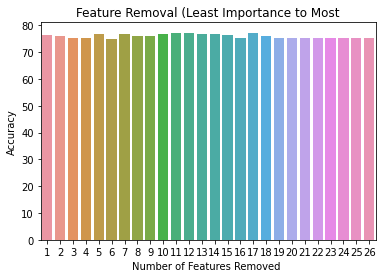

MessageError: ignored

In [0]:
#Run Model on Features by iteratively removing least important to most

removal=[]
FeatureAccuracy2 = np.zeros(len(Features)-3)

for i in range (len(Features)-3):
  #print(AccArray[i, 0 ])
  removal.append(AccArray[i,0])
  
  Reduction=np.delete(XTRAIN, removal, axis=1)
  RedValid=np.delete(XVALID, removal, axis=1)
  #print(Reduction.shape)
  print("/////////////////////////////////////////////////////////" + str(i))
  model = Sequential()
  model.add(Dense(10, input_dim = (27-i), kernel_initializer='normal', activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  callback_a = ModelCheckpoint(filepath= 'project.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
  callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 10, verbose=1)
  history = model.fit(Reduction, YTRAIN, batch_size=23000, epochs=1000, verbose=1, validation_data=(RedValid, YVALID), callbacks=[callback_a, callback_b]) 
  model.load_weights('project.hdf5')
  prediction = model.predict(RedValid)
  prediction = np.round(np.clip(model.predict(RedValid), 0, 1)) # binary
  Validation_Accuracy = accuracy_score(YVALID, prediction.round())
  FeatureAccuracy2[i] = (Validation_Accuracy * 100)

Nums=np.arange(1,27) 
plt.clf() 
fig= sns.barplot(x=Nums, y=FeatureAccuracy2)
plt.xlabel("Number of Features Removed ")
plt.ylabel("Accuracy")
plt.title("Feature Removal (Least Importance to Most")
plt.show()

np.savetxt('featureReduction.csv', AccArray, fmt='%.1f', delimiter=',')
files.download('featureReduction.csv')

In [0]:
#Print (Repeat of the graph printed above)
Nums=np.arange(1,27) 
print(Nums.shape)
print(FeatureAccuracy2.shape)
plt.clf() 
fig= sns.barplot(x=Nums, y=FeatureAccuracy2)
plt.xlabel("Number of Features Removed ")
plt.ylabel("Accuracy")
plt.title("Feature Removal (Least Importance to Most")
plt.show()

print(AccArray)

In [0]:
np.savetxt('featureReduction.csv', AccArray, fmt='%.1f', delimiter=',')
files.download('featureReduction.csv')

**------Test Reduced Model with One Hot Encoding with Feature Reduction------**

In [0]:
#Import Array of Feature Importance By Accuracy

from google.colab import files
uploaded = files.upload()

Saving featureReduction.csv to featureReduction.csv


In [0]:
import pandas as pd
A_Array = pd.read_csv('featureReduction.csv', delimiter=',', dtype="category") 

A_Array.head()
#print(data.dtypes)

import numpy as np
AccArray = np.genfromtxt('featureReduction.csv', delimiter=",", skip_header = False) 
print(AccArray.shape)
print(AccArray)

(28, 2)
[[ 3.  24.7]
 [14.  24.8]
 [22.  24.8]
 [15.  24.8]
 [27.  24.8]
 [13.  24.8]
 [11.  24.8]
 [10.  24.8]
 [ 9.  24.8]
 [23.  24.8]
 [ 7.  24.8]
 [26.  24.8]
 [21.  24.8]
 [ 2.  24.8]
 [24.  28.5]
 [12.  35. ]
 [25.  75.2]
 [20.  75.2]
 [ 1.  75.2]
 [18.  75.2]
 [17.  75.2]
 [16.  75.2]
 [ 8.  75.2]
 [ 6.  75.2]
 [ 5.  75.2]
 [ 4.  75.2]
 [19.  75.2]
 [28.  75.2]]


In [0]:
#Automated Loop for Output with One Hot Encoding

removalFinal=[]
ReducedTestingl=[]
Features = data.columns 
OneHotEncodingAccuracy = np.zeros(len(Features)-1)

for i in range (27):
  #Append Reduction Data to be tested incrementially 
  removalFinal.append(AccArray[i,0])
  #print(removalFinal)
  Reduction=np.delete(dataset, removalFinal, axis=1)
  #Print(Reduction.shape)
  print("/////////////////////////////////////////////////////////" + str(i+1))

  #Set Variables for Shaping DataSet for One Hot Encoding & Train Test Split
  Size= Reduction.shape[1]
  Size1= Reduction.shape[1]-1

  #Splitting Inputs and Output
  X=Reduction[:,:Size1] #Inputs Reduction Shape -1
  y=Reduction[:,Size1]  #Output Reduction Shape -1

  #OneHotEncode Data
  from sklearn.preprocessing import OneHotEncoder
  enc = OneHotEncoder(drop='first', sparse=False)
  Xenc = enc.fit(X[:,:Size1]).transform(X[:,:Size]) 
  #print("Xenc Shape: " +str(Xenc.shape))
  DensityX = Xenc.shape[1]
  #print("DensityX : " + str(DensityX))

  #Train Test Split and seed
  from sklearn.model_selection import train_test_split
  XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(Xenc, y, random_state= 4300, 
  test_size = .15, shuffle=True)

  #Build Testing Model
  model = Sequential()
  model.add(Dense(10, input_dim = DensityX, kernel_initializer='normal', activation='sigmoid'))
  #model.add(Dense(40, activation='sigmoid'))
  #model.add(Dense(40, activation='sigmoid'))
  model.add(Dense(1, activation='sigmoid'))

  #Compile Run Model 
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])
  callback_a = ModelCheckpoint(filepath= 'project.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
  callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 50, verbose=1)
  history = model.fit(XTRAIN, YTRAIN, batch_size=23000, epochs=2000, verbose=1, validation_data=(XVALID, YVALID), callbacks=[callback_a, callback_b]) 

  #Save Each Models Perfomance
  model.load_weights('project.hdf5')
  prediction = model.predict(XVALID)
  prediction = np.round(np.clip(model.predict(XVALID), 0, 1)) # binary
  Validation_Accuracy = accuracy_score(YVALID, prediction.round())
  OneHotEncodingAccuracy[i] = (Validation_Accuracy * 100)


#Recall All Libraries incase of timeout
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from keras.metrics import categorical_accuracy
from keras.optimizers import SGD
from keras.optimizers import adam
from keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

Nums = np.arange(1,29) #Iteration Number for graph
#Nums = AccArray[:,0] #Column Removal by number

plt.clf() 
fig= sns.barplot(x=Nums, y=OneHotEncodingAccuracy)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel("Iteration of Feature Column Removal")
plt.ylabel("Accuracy")
plt.title("Feature Reduction")
plt.show()

print("OneHotEncodingAccuracy: ")
print(OneHotEncodingAccuracy)

print("AccArray: ")
print(AccArray)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////1
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7378 - binary_accuracy: 0.2508
Epoch 00001: val_loss improved from inf to 0.72660, saving model to project.hdf5
2/2 [==============================] - 0s 68ms/step - loss: 0.7350 - binary_accuracy: 0.2502 - val_loss: 0.7266 - val_binary_accuracy: 0.2515
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7263 - binary_accuracy: 0.2563
Epoch 00002: val_loss improved from 0.72660 to 0.71519, saving model to project.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.7229 - binary_accuracy: 0.2589 - val_loss: 0.7152 - val_binary_accuracy: 0.2886
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7147 - binary_accuracy: 0.2930
Epoch 00003: val_loss improved from 0.71519 to 0.70424, saving model to project.hdf5
2/2 [==============================] - 0s 35ms/step - loss: 0.7121 - binary_accuracy: 0.2995 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////2
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6207 - binary_accuracy: 0.7505
Epoch 00001: val_loss improved from inf to 0.61382, saving model to project.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.6189 - binary_accuracy: 0.7508 - val_loss: 0.6138 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6147 - binary_accuracy: 0.7492
Epoch 00002: val_loss improved from 0.61382 to 0.60769, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6116 - binary_accuracy: 0.7508 - val_loss: 0.6077 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6083 - binary_accuracy: 0.7499
Epoch 00003: val_loss improved from 0.60769 to 0.60197, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6061 - binary_accuracy: 0.7508 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////3
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8503 - binary_accuracy: 0.2504
Epoch 00001: val_loss improved from inf to 0.83995, saving model to project.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.8490 - binary_accuracy: 0.2492 - val_loss: 0.8399 - val_binary_accuracy: 0.2476
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8388 - binary_accuracy: 0.2499
Epoch 00002: val_loss improved from 0.83995 to 0.82839, saving model to project.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.8368 - binary_accuracy: 0.2492 - val_loss: 0.8284 - val_binary_accuracy: 0.2476
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.8288 - binary_accuracy: 0.2469
Epoch 00003: val_loss improved from 0.82839 to 0.81710, saving model to project.hdf5
2/2 [==============================] - 0s 35ms/step - loss: 0.8232 - binary_accuracy: 0.2492 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
Epoch 00216: val_loss improved from 0.53395 to 0.53371, saving model to project.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.5320 - binary_accuracy: 0.7508 - val_loss: 0.5337 - val_binary_accuracy: 0.7524
Epoch 217/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5351 - binary_accuracy: 0.7502
Epoch 00217: val_loss improved from 0.53371 to 0.53347, saving model to project.hdf5
2/2 [==============================] - 0s 37ms/step - loss: 0.5337 - binary_accuracy: 0.7508 - val_loss: 0.5335 - val_binary_accuracy: 0.7524
Epoch 218/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5347 - binary_accuracy: 0.7503
Epoch 00218: val_loss improved from 0.53347 to 0.53324, saving model to project.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.5336 - binary_accuracy: 0.7508 - val_loss: 0.5332 - val_binary_accuracy: 0.7524
Epoch 219/2000
1/2 [==============>...............] - ETA: 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////5
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7307 - binary_accuracy: 0.2467
Epoch 00001: val_loss improved from inf to 0.72201, saving model to project.hdf5
2/2 [==============================] - 0s 71ms/step - loss: 0.7277 - binary_accuracy: 0.2495 - val_loss: 0.7220 - val_binary_accuracy: 0.2501
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7221 - binary_accuracy: 0.2513
Epoch 00002: val_loss improved from 0.72201 to 0.71399, saving model to project.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.7201 - binary_accuracy: 0.2531 - val_loss: 0.7140 - val_binary_accuracy: 0.2658
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7140 - binary_accuracy: 0.2638
Epoch 00003: val_loss improved from 0.71399 to 0.70622, saving model to project.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.7123 - binary_accuracy: 0.2661 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////6
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6004 - binary_accuracy: 0.7507
Epoch 00001: val_loss improved from inf to 0.59612, saving model to project.hdf5
2/2 [==============================] - 0s 75ms/step - loss: 0.5996 - binary_accuracy: 0.7508 - val_loss: 0.5961 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5966 - binary_accuracy: 0.7523
Epoch 00002: val_loss improved from 0.59612 to 0.59313, saving model to project.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.5976 - binary_accuracy: 0.7508 - val_loss: 0.5931 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5944 - binary_accuracy: 0.7503
Epoch 00003: val_loss improved from 0.59313 to 0.59028, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5933 - binary_accuracy: 0.7508 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////7
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7073 - binary_accuracy: 0.2869
Epoch 00001: val_loss improved from inf to 0.69994, saving model to project.hdf5
2/2 [==============================] - 0s 72ms/step - loss: 0.7056 - binary_accuracy: 0.2920 - val_loss: 0.6999 - val_binary_accuracy: 0.3733
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7002 - binary_accuracy: 0.3673
Epoch 00002: val_loss improved from 0.69994 to 0.69289, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6982 - binary_accuracy: 0.3807 - val_loss: 0.6929 - val_binary_accuracy: 0.5017
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6930 - binary_accuracy: 0.5049
Epoch 00003: val_loss improved from 0.69289 to 0.68605, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6914 - binary_accuracy: 0.5182 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
Epoch 00572: val_loss improved from 0.52141 to 0.52128, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5201 - binary_accuracy: 0.7527 - val_loss: 0.5213 - val_binary_accuracy: 0.7544
Epoch 573/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5202 - binary_accuracy: 0.7536
Epoch 00573: val_loss improved from 0.52128 to 0.52114, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5219 - binary_accuracy: 0.7526 - val_loss: 0.5211 - val_binary_accuracy: 0.7546
Epoch 574/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5197 - binary_accuracy: 0.7535
Epoch 00574: val_loss improved from 0.52114 to 0.52101, saving model to project.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.5224 - binary_accuracy: 0.7526 - val_loss: 0.5210 - val_binary_accuracy: 0.7546
Epoch 575/2000
1/2 [==============>...............] - ETA: 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////9
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7156 - binary_accuracy: 0.2529
Epoch 00001: val_loss improved from inf to 0.70850, saving model to project.hdf5
2/2 [==============================] - 0s 62ms/step - loss: 0.7139 - binary_accuracy: 0.2550 - val_loss: 0.7085 - val_binary_accuracy: 0.2785
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7085 - binary_accuracy: 0.2753
Epoch 00002: val_loss improved from 0.70850 to 0.70146, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.7066 - binary_accuracy: 0.2833 - val_loss: 0.7015 - val_binary_accuracy: 0.3442
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7014 - binary_accuracy: 0.3503
Epoch 00003: val_loss improved from 0.70146 to 0.69461, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.6997 - binary_accuracy: 0.3622 - val_loss

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////10
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6969 - binary_accuracy: 0.4179
Epoch 00001: val_loss improved from inf to 0.69117, saving model to project.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 0.6954 - binary_accuracy: 0.4314 - val_loss: 0.6912 - val_binary_accuracy: 0.5484
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6911 - binary_accuracy: 0.5536
Epoch 00002: val_loss improved from 0.69117 to 0.68544, saving model to project.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.6896 - binary_accuracy: 0.5655 - val_loss: 0.6854 - val_binary_accuracy: 0.6605
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6853 - binary_accuracy: 0.6688
Epoch 00003: val_loss improved from 0.68544 to 0.67984, saving model to project.hdf5
2/2 [==============================] - 0s 33ms/step - loss: 0.6840 - binary_accuracy: 0.6762 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////11
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6631 - binary_accuracy: 0.7375
Epoch 00001: val_loss improved from inf to 0.65632, saving model to project.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.6617 - binary_accuracy: 0.7377 - val_loss: 0.6563 - val_binary_accuracy: 0.7510
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6564 - binary_accuracy: 0.7483
Epoch 00002: val_loss improved from 0.65632 to 0.64982, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.6549 - binary_accuracy: 0.7482 - val_loss: 0.6498 - val_binary_accuracy: 0.7522
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6501 - binary_accuracy: 0.7498
Epoch 00003: val_loss improved from 0.64982 to 0.64358, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.6482 - binary_accuracy: 0.7503 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////12
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5830 - binary_accuracy: 0.7510
Epoch 00001: val_loss improved from inf to 0.57917, saving model to project.hdf5
2/2 [==============================] - 0s 73ms/step - loss: 0.5827 - binary_accuracy: 0.7508 - val_loss: 0.5792 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5825 - binary_accuracy: 0.7482
Epoch 00002: val_loss improved from 0.57917 to 0.57692, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.5775 - binary_accuracy: 0.7508 - val_loss: 0.5769 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5782 - binary_accuracy: 0.7514
Epoch 00003: val_loss improved from 0.57692 to 0.57480, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.5786 - binary_accuracy: 0.7508 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////13
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7137 - binary_accuracy: 0.2788
Epoch 00001: val_loss improved from inf to 0.70639, saving model to project.hdf5
2/2 [==============================] - 0s 64ms/step - loss: 0.7118 - binary_accuracy: 0.2834 - val_loss: 0.7064 - val_binary_accuracy: 0.3331
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.7060 - binary_accuracy: 0.3327
Epoch 00002: val_loss improved from 0.70639 to 0.69889, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.7042 - binary_accuracy: 0.3414 - val_loss: 0.6989 - val_binary_accuracy: 0.4274
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6987 - binary_accuracy: 0.4218
Epoch 00003: val_loss improved from 0.69889 to 0.69162, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.6967 - binary_accuracy: 0.4336 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
Epoch 00582: val_loss improved from 0.52872 to 0.52870, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.5239 - binary_accuracy: 0.7526 - val_loss: 0.5287 - val_binary_accuracy: 0.7522
Epoch 583/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5232 - binary_accuracy: 0.7538
Epoch 00583: val_loss improved from 0.52870 to 0.52869, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.5285 - binary_accuracy: 0.7526 - val_loss: 0.5287 - val_binary_accuracy: 0.7520
Epoch 584/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5263 - binary_accuracy: 0.7524
Epoch 00584: val_loss improved from 0.52869 to 0.52867, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.5237 - binary_accuracy: 0.7526 - val_loss: 0.5287 - val_binary_accuracy: 0.7520
Epoch 585/2000
1/2 [==============>...............] - ETA: 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////15
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6182 - binary_accuracy: 0.7506
Epoch 00001: val_loss improved from inf to 0.61298, saving model to project.hdf5
2/2 [==============================] - 0s 70ms/step - loss: 0.6170 - binary_accuracy: 0.7508 - val_loss: 0.6130 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6141 - binary_accuracy: 0.7497
Epoch 00002: val_loss improved from 0.61298 to 0.60864, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.6119 - binary_accuracy: 0.7508 - val_loss: 0.6086 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6088 - binary_accuracy: 0.7521
Epoch 00003: val_loss improved from 0.60864 to 0.60451, saving model to project.hdf5
2/2 [==============================] - 0s 27ms/step - loss: 0.6092 - binary_accuracy: 0.7508 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
1/2 [==============>...............] - ETA: 0s - loss: 0.5273 - binary_accuracy: 0.7527
Epoch 00751: val_loss improved from 0.53094 to 0.53093, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.5277 - binary_accuracy: 0.7530 - val_loss: 0.5309 - val_binary_accuracy: 0.7528
Epoch 752/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5279 - binary_accuracy: 0.7527
Epoch 00752: val_loss improved from 0.53093 to 0.53092, saving model to project.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.5267 - binary_accuracy: 0.7531 - val_loss: 0.5309 - val_binary_accuracy: 0.7528
Epoch 753/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5259 - binary_accuracy: 0.7537
Epoch 00753: val_loss improved from 0.53092 to 0.53090, saving model to project.hdf5
2/2 [==============================] - 0s 28ms/step - loss: 0.5297 - binary_accuracy: 0.7531 - val_loss: 0.5309 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
1/2 [==============>...............] - ETA: 0s - loss: 0.5251 - binary_accuracy: 0.7524
Epoch 00751: val_loss improved from 0.52844 to 0.52844, saving model to project.hdf5
2/2 [==============================] - 0s 40ms/step - loss: 0.5232 - binary_accuracy: 0.7532 - val_loss: 0.5284 - val_binary_accuracy: 0.7514
Epoch 752/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5267 - binary_accuracy: 0.7513
Epoch 00752: val_loss improved from 0.52844 to 0.52843, saving model to project.hdf5
2/2 [==============================] - 0s 40ms/step - loss: 0.5207 - binary_accuracy: 0.7532 - val_loss: 0.5284 - val_binary_accuracy: 0.7514
Epoch 753/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5253 - binary_accuracy: 0.7519
Epoch 00753: val_loss improved from 0.52843 to 0.52842, saving model to project.hdf5
2/2 [==============================] - 0s 32ms/step - loss: 0.5229 - binary_accuracy: 0.7532 - val_loss: 0.5284 - va

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////18
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6482 - binary_accuracy: 0.7511
Epoch 00001: val_loss improved from inf to 0.64296, saving model to project.hdf5
2/2 [==============================] - 0s 69ms/step - loss: 0.6472 - binary_accuracy: 0.7508 - val_loss: 0.6430 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6438 - binary_accuracy: 0.7497
Epoch 00002: val_loss improved from 0.64296 to 0.63827, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.6419 - binary_accuracy: 0.7508 - val_loss: 0.6383 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6383 - binary_accuracy: 0.7528
Epoch 00003: val_loss improved from 0.63827 to 0.63373, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.6386 - binary_accuracy: 0.7508 - val_los

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


Streaming output truncated to the last 5000 lines.
Epoch 00116: val_loss improved from 0.63518 to 0.63338, saving model to project.hdf5
2/2 [==============================] - 0s 31ms/step - loss: 0.6346 - binary_accuracy: 0.7497 - val_loss: 0.6334 - val_binary_accuracy: 0.7510
Epoch 117/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6329 - binary_accuracy: 0.7484
Epoch 00117: val_loss improved from 0.63338 to 0.63162, saving model to project.hdf5
2/2 [==============================] - 0s 29ms/step - loss: 0.6324 - binary_accuracy: 0.7496 - val_loss: 0.6316 - val_binary_accuracy: 0.7510
Epoch 118/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.6317 - binary_accuracy: 0.7480
Epoch 00118: val_loss improved from 0.63162 to 0.62990, saving model to project.hdf5
2/2 [==============================] - 0s 34ms/step - loss: 0.6299 - binary_accuracy: 0.7497 - val_loss: 0.6299 - val_binary_accuracy: 0.7510
Epoch 119/2000
1/2 [==============>...............] - ETA: 0s 

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # This is added back by InteractiveShellApp.init_path()


/////////////////////////////////////////////////////////20
Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5719 - binary_accuracy: 0.7518
Epoch 00001: val_loss improved from inf to 0.56970, saving model to project.hdf5
2/2 [==============================] - 0s 65ms/step - loss: 0.5736 - binary_accuracy: 0.7508 - val_loss: 0.5697 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5705 - binary_accuracy: 0.7517
Epoch 00002: val_loss improved from 0.56970 to 0.56825, saving model to project.hdf5
2/2 [==============================] - 0s 27ms/step - loss: 0.5720 - binary_accuracy: 0.7508 - val_loss: 0.5683 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5694 - binary_accuracy: 0.7511
Epoch 00003: val_loss improved from 0.56825 to 0.56692, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.5700 - binary_accuracy: 0.7508 - val_los

In [0]:
print(AccArray[:,0])

[ 3. 14. 22. 15. 27. 13. 11. 10.  9. 23.  7. 26. 21.  2. 24. 12. 25. 20.
  1. 18. 17. 16.  8.  6.  5.  4. 19. 28.]


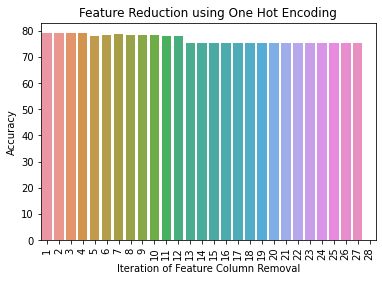

OneHotEncodingAccuracy: 
[79.05 79.14 79.14 79.1  78.17 78.41 78.61 78.55 78.33 78.45 78.04 78.17
 75.46 75.2  75.4  75.44 75.28 75.24 75.24 75.24 75.24 75.24 75.26 75.24
 75.24 75.24 75.24  0.  ]
AccArray: 
[[ 3.  24.7]
 [14.  24.8]
 [22.  24.8]
 [15.  24.8]
 [27.  24.8]
 [13.  24.8]
 [11.  24.8]
 [10.  24.8]
 [ 9.  24.8]
 [23.  24.8]
 [ 7.  24.8]
 [26.  24.8]
 [21.  24.8]
 [ 2.  24.8]
 [24.  28.5]
 [12.  35. ]
 [25.  75.2]
 [20.  75.2]
 [ 1.  75.2]
 [18.  75.2]
 [17.  75.2]
 [16.  75.2]
 [ 8.  75.2]
 [ 6.  75.2]
 [ 5.  75.2]
 [ 4.  75.2]
 [19.  75.2]
 [28.  75.2]]


In [0]:
#print(OneHotEncodingAccuracy)

plt.clf() 
fig= sns.barplot(x=Nums, y=OneHotEncodingAccuracy)
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel("Iteration of Feature Column Removal")
plt.ylabel("Accuracy")
plt.title("Feature Reduction using One Hot Encoding")
plt.show()

print("OneHotEncodingAccuracy: ")
print(OneHotEncodingAccuracy)

print("AccArray: ")
print(AccArray)

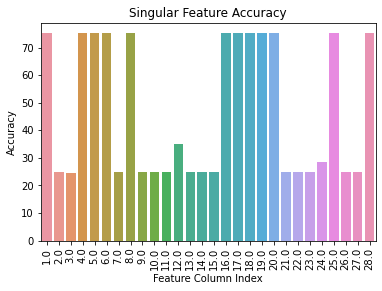

In [0]:
plt.clf() 
Nums = np.arange(1,29)

plt.clf() 
fig= sns.barplot(x=AccArray[:,0], y=AccArray[:,1])
fig.set_xticklabels(fig.get_xticklabels(), rotation=90)
plt.xlabel("Feature Column Index")
plt.ylabel("Accuracy")
plt.title("Singular Feature Accuracy")
plt.show()

In [0]:
#Manipulate dataset by removing n columns by least importance
#to be tested using the final Model

removalFinal=[]
ReducedTestingl=[]

for i in range (4):
  removalFinal.append(AccArray[i,0])
  print(removalFinal)

  Reduction=np.delete(dataset, removalFinal, axis=1)
  print(Reduction.shape)
  
  print("/////////////////////////////////////////////////////////" + str(i+1))

print("\nReduction Shape:")
print(Reduction.shape)

[3.0]
(33654, 28)
/////////////////////////////////////////////////////////1
[3.0, 14.0]
(33654, 27)
/////////////////////////////////////////////////////////2
[3.0, 14.0, 22.0]
(33654, 26)
/////////////////////////////////////////////////////////3
[3.0, 14.0, 22.0, 15.0]
(33654, 25)
/////////////////////////////////////////////////////////4

Reduction Shape:
(33654, 25)


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':


In [0]:
#If Features need to be removed then run final model
#dataset=dataset.drop(dataset.columns[RevoalArray], axis=1)

In [0]:
#Shuffle and Display
np.set_printoptions(precision = 2)
np.set_printoptions(formatter = {'int': '{: 1f}'.format})

#shuffle
#import random
#np.random.shuffle(dataset)

#New Reduced Dataset : Reduction

print("Shape of Reduction: " + str(Reduction.shape))
#print('')
#print(Reduction[0:15])
Size= Reduction.shape[1]
Size1= Reduction.shape[1]-1
print("Size = " +str(Size))
print("Size1 = " +str(Size1))

Shape of Reduction: (33654, 24)
Size = 24
Size1 = 23


In [0]:
#Splitting Inputs and Output
X=Reduction[:,:Size1] #Inputs Reduction Shape -1
y=Reduction[:,Size1]  #Output Reduction Shape -1
#X=dataset[:,:28]
#y=dataset[:,28]
print("Shape of X: " +str(X.shape))
print("Shape of y: " +str(y.shape))
print("First 15 Rows of output (should contain 3, 1's):" +str(y[0:15]))

Shape of X: (33654, 23)
Shape of y: (33654,)
First 15 Rows of output (should contain 3, 1's):[0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0.]


In [0]:
#OneHotEncode Data

from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(drop='first', sparse=False)
Xenc = enc.fit(X[:,:Size1]).transform(X[:,:Size]) #For Loop AutoMated
#Xenc = enc.fit(X[:,:28]).transform(X[:,:29]) #For Original Full Dataset
print("Xenc Shape: " +str(Xenc.shape))
DimX = Xenc.shape[1]
print("DimX : " + str(DimX))

Xenc Shape: (33654, 296)
DimX : 296


In [0]:
#Train Test Split and seed
from sklearn.model_selection import train_test_split
XTRAIN, XVALID, YTRAIN, YVALID = train_test_split(Xenc, y, random_state= 4300, 
test_size = .15, shuffle=True) #, stratify=y )
print(XTRAIN.shape)
print(XVALID.shape)
print(YTRAIN.shape)
print(YVALID.shape)

#Normalize test Group (Not Needed if Using One Hot Encoding)
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#scaler.fit(XTRAIN)
#XTRAIN = scaler.transform(XTRAIN)
#XVALID = scaler.transform(XVALID)

(28605, 296)
(5049, 296)
(28605,)
(5049,)


In [0]:
#Verify Shapes of XTRAIN/VALID YTRAIN/VALID
print("Training Shape: " + str(XTRAIN.shape))
print("Training Output Shape: " + str(YTRAIN.shape))
print("Validation Shape: " + str(XVALID.shape))
print("Validation Output Shape: " + str(YVALID.shape))

Training Shape: (28605, 296)
Training Output Shape: (28605,)
Validation Shape: (5049, 296)
Validation Output Shape: (5049,)


In [0]:
print("Total Drunk Drivers for Training Data: " + str(sum(YTRAIN)))
print("Total Drunk Drivers for Validation Data: " + str(sum(YVALID)))
print("Total Drunk Drivers in Training and Validation: " + str(sum(YTRAIN)+sum(YVALID)))
print("Total Drunk Drivers from Original Dataset: " +str(sum(dataset[:,28])))
print()
ratio = (100*(1-8379/33654))
print("Percent of the incidents not involving a drunk driver %.2f%%" % ratio)

Total Drunk Drivers for Training Data: 7129.0
Total Drunk Drivers for Validation Data: 1250.0
Total Drunk Drivers in Training and Validation: 8379.0
Total Drunk Drivers from Original Dataset: 8379.0

Percent of the incidents not involving a drunk driver 75.10%


In [0]:
model = Sequential()
model.add(Dense(10, input_dim = DimX, kernel_initializer='normal', activation='sigmoid'))
#model.add(Dense(40, activation='sigmoid'))
#model.add(Dense(40, activation='sigmoid'))
model.add(Dense(1, activation='sigmoid'))

In [0]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['binary_accuracy'])

callback_a = ModelCheckpoint(filepath= 'project.hdf5', monitor='val_loss', save_best_only = True, save_weights_only = True, verbose = 1)
callback_b = EarlyStopping(monitor = 'val_loss', mode = 'min', patience = 50, verbose=1)

history = model.fit(XTRAIN, YTRAIN, batch_size=23000, epochs=2000, verbose=1, validation_data=(XVALID, YVALID), callbacks=[callback_a, callback_b]) 

Epoch 1/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5954 - binary_accuracy: 0.7507
Epoch 00001: val_loss improved from inf to 0.59017, saving model to project.hdf5
2/2 [==============================] - 0s 67ms/step - loss: 0.5948 - binary_accuracy: 0.7508 - val_loss: 0.5902 - val_binary_accuracy: 0.7524
Epoch 2/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5937 - binary_accuracy: 0.7471
Epoch 00002: val_loss improved from 0.59017 to 0.58660, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.5877 - binary_accuracy: 0.7508 - val_loss: 0.5866 - val_binary_accuracy: 0.7524
Epoch 3/2000
1/2 [==============>...............] - ETA: 0s - loss: 0.5872 - binary_accuracy: 0.7525
Epoch 00003: val_loss improved from 0.58660 to 0.58324, saving model to project.hdf5
2/2 [==============================] - 0s 30ms/step - loss: 0.5888 - binary_accuracy: 0.7508 - val_loss: 0.5832 - val_binary_accuracy: 0.7524
Epoch 4/2000
1/2 [==

{'verbose': 1, 'epochs': 2000, 'steps': 2}


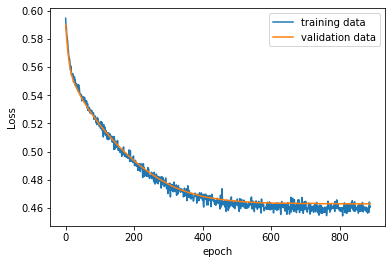

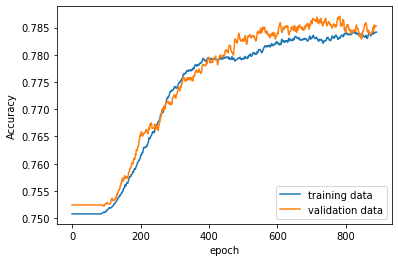

Model: "sequential_198"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_398 (Dense)            (None, 10)                2970      
_________________________________________________________________
dense_399 (Dense)            (None, 1)                 11        
Total params: 2,981
Trainable params: 2,981
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.load_weights('project.hdf5')

# Check what's in the history
import matplotlib.pyplot as plt
import matplotlib.pyplot as plt2
print(history.params)
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['loss']) # replace with accuracy/MAE
plt.plot(history.history['val_loss']) # replace with val_accuracy, etc.
plt.ylabel('Loss')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='upper right')
plt.show()
# Plot the learning curves (loss/accuracy/MAE)
plt.plot(history.history['binary_accuracy']) # replace with accuracy/MAE
plt.plot(history.history['val_binary_accuracy']) # replace with val_accuracy, etc.
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['training data', 'validation data'], loc='lower right')
plt2.show()
model.summary()

In [0]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
np.set_printoptions(precision = 2)

prediction = model.predict(XVALID)
prediction = np.round(np.clip(model.predict(XVALID), 0, 1)) # binary

Validation_Accuracy = accuracy_score(YVALID, prediction.round())
Validation_Precision = precision_score(YVALID, prediction.round())
Validation_Recall = recall_score(YVALID, prediction.round())
Validation_F1score = f1_score(YVALID, prediction.round())

print("Validation Accuracy: %.2f%%" % (Validation_Accuracy * 100.0))
print("Validation Precision: %.2f%%" % (Validation_Precision * 100.0))
print("Validation Recall: %.2f%%" % (Validation_Recall * 100.0))
print("Validation F1-score: %.2f" % (Validation_F1score))
print()
result = (100*Validation_Accuracy)-ratio
print("Model's predicted outcome rated against assuming \n"
+ "non-intoxicated involvment for all cases of %.2f%%"  %result +" points.")

Validation Accuracy: 78.39%
Validation Precision: 60.67%
Validation Recall: 36.16%
Validation F1-score: 0.45

Model's predicted outcome rated against assuming 
non-intoxicated involvment for all cases of 3.29% points.


In [0]:
np.set_printoptions(precision = 2)
#print ('True Data:')
#print(YVALID[:10])
#prediction = model.predict(XVALID)
#prediction = np.round(np.clip(model.predict(XVALID), 0, 1)) # binary
#print ('Prediction:')
#print(prediction[0:10])

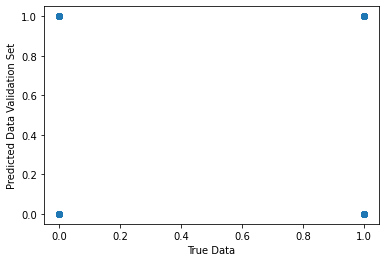

In [0]:
import matplotlib.pyplot as plt

plt.scatter(YVALID, prediction)
plt.ylabel('Predicted Data Validation Set')
plt.xlabel('True Data')
plt.show()